### __Credit scoring dataset__

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [215]:
df = pd.read_csv('CreditScoring.csv')

### __Data cleaning__

In [216]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


* __Although most of the columns are numerical, some are categorical: status, home, marital [status], records, and job. The values we see in the DataFrame, however, are numbers, not strings. This means that we need to translate them to their actual names.__

In [217]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


* __In Pandas, we can use map for converting the numbers to strings. For that, we first define the dictionary with mapping from the current value (number) to the desired value (string):__

In [218]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


* __We repeat the same procedure for all the other columns.__

In [219]:
#home column:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

#marital, records, and job columns:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'parttime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


* __NaN = income, assets, and debt.__

In [220]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [221]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


* __target variable status:__

In [222]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [223]:
df = df[df.status != 'unk']

### __Dataset preparation__

* Split the dataset into train, validation, and test.
* Handle missing values.
* Use one-hot encoding to encode categorical variables.
* Create the feature matrix X and the target variable y.

___split the data into three parts:___

* Training data (60%)
* Validation data (20%)
* Test data (20%)


In [224]:
from sklearn.model_selection import train_test_split

df_train_full, df_test, = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [225]:
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

In [226]:
y_train = (df_train.status == 'default').values
y_val = (df_val.status == 'default').values

* __The outcome we want to predict is status (y).__
* __Objective = determine if somebody fails to pay back the loan. The positive class is __default.____

In [227]:
del df_train['status']
del df_val['status']

* __X = feature matrix.__

In [228]:
# Replacing missing values with zero.
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

* __To use categorical variables, we need to encode them.__
* __In one-hot encoding, each value is encoded as “1” if it’s present (“hot”) or “0” if it’s absent (“cold”).__
* __DictVectorizer needs a list of dictionaries__

In [229]:
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')

*   __**DictVectorizer**: This is used to convert lists of feature-value mappings (in the form of Python dictionaries) into a format that can be used by machine learning algorithms (a feature matrix).__
*   __**fit_transform**: This method is called on the training data __(dict_train)__. It first learns the vocabulary of all the features present in the data (fitting) and then converts the training data into a feature matrix (transforming).__
*   __**transform**: This method is called on the validation data __(dict_val).__ It uses the vocabulary learned from the training data to transform the validation data into a feature matrix. This ensures that the same features are used for both training and validation.__


In [230]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

## __Decision trees__

### __Decision tree classifier__

In [231]:
from sklearn.tree import DecisionTreeClassifier

*   **DecisionTreeClassifier()**: In this project, we are building a model to predict credit risk. We are using a **Decision Tree Classifier**, which is a type of model that makes predictions by learning a set of decision rules from the data. This is like creating a flowchart of questions to ask about a loan applicant to decide whether they are likely to default.

*   **fit(X_train, y_train)**: This is the training step. We are training our **Decision Tree** model on the **X_train** data, which contains the features of the loan applicants in our training set (like their income, age, etc.). The **y_train** variable is the target, which tells the model whether each applicant in the training set has defaulted or not. By calling **fit**, the model learns the patterns in the data that can be used to predict whether a new applicant will default.

In [232]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


* __AUC shows how well a model separates positive examples from negative examples.__
* __it describes the probability that a randomly chosen positive example (“default”) has a higher score than a randomly chosen negative example(“OK”).__
* __This is a relevant metric for the project: we want risky clients to have higher scores than nonrisky ones.__

In [233]:
from sklearn.metrics import roc_auc_score

* __Because we chose AUC as the evaluation metric, we need scores, not hard predictions.__

In [234]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

* __Let’s check the score on validation:__

In [235]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6589511031459641

* __One word: overfitting.__
---
* __The model overfit the training data, meaning it memorized the data instead of learning general patterns.__
* __As a result, it performed poorly on the validation set with unseen data.__
* __The learned rules were too specific to the training data and did not generalize to new customers.__
---
* __A tree with more levels can learn more complex rules. A tree with two levels is less complex than a tree with three levels and, thus, less prone to overfitting.__
---
*   **Each line in the output is a node with a condition.**
*   **We traverse the tree by following the conditions until we reach a final decision.**
*   **A class of True means the prediction is "default"; otherwise, it is "OK".**
*   **The condition records=no > 0.50 is true for customers with no previous records, due to the one-hot encoding scheme used for the records feature.**


In [236]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

from sklearn.tree import export_text

tree_text = export_text(dt, feature_names=dv.feature_names_)
print(tree_text)

|--- records=yes <= 0.50
|   |--- job=parttime <= 0.50
|   |   |--- class: False
|   |--- job=parttime >  0.50
|   |   |--- class: True
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: True
|   |--- seniority >  6.50
|   |   |--- class: False



In [237]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('validation auc', auc)

train auc 0.7054989859726213
validation auc 0.6685264343319367


### __Decision tree learning algorithm__

*   **The goal of a decision tree is to create pure groups (nodes) where all observations belong to the same class.**
*   **The algorithm finds the best split by trying all possible values and selecting the one that results in the lowest impurity.**
*   **Impurity measures how mixed the classes are in a group. Common impurity measures include misclassification rate, Gini impurity, and entropy.**
*   **The misclassification rate is the percentage of observations in a group that do not belong to the majority class.**
*   **The overall impurity of a split is the weighted average of the impurity of the groups created by the split.**
---
*   **When building a decision tree with multiple features, the algorithm searches through all features and all possible thresholds to find the split that results in the lowest impurity.**
*   **This splitting process is applied recursively to the resulting groups, creating a tree structure.**
*   **To prevent the tree from becoming too complex and overfitting the data, we use stopping criteria to limit its growth.**
*   **Common stopping criteria include the group being pure, reaching the maximum allowed depth (controlled by the max_depth parameter), or the group being too small to split (controlled by the min_samples_leaf parameter).**
*   **By tuning these parameters, we can control the complexity of the decision tree and improve its performance on unseen data.**


### __Parameter tuning for decision tree__

*   **This code performs hyperparameter tuning for the max_depth of a decision tree.**
*   **It iterates through a list of different values for max_depth.**
*   **For each value, it trains a decision tree model and calculates the AUC score on the validation set.**
*   **The goal is to find the max_depth value that results in the best AUC score, which indicates the best model performance.**

In [238]:
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.745
  10 -> 0.696
  15 -> 0.670
  20 -> 0.656
None -> 0.647


*   **This code performs hyperparameter tuning for both the max_depth and min_samples_leaf of a decision tree.**
*   **It uses nested loops to iterate through different combinations of values for these two parameters.**
*   **For each combination, it trains a decision tree model and calculates the AUC score on the validation set.**
*   **The goal is to find the combination of max_depth and min_samples_leaf that results in the best AUC score, which indicates the best model performance.**

In [239]:
for m in [4, 5, 6]:
    print('depth: %s' % m)

    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))
        
print()

depth: 4
1 -> 0.761
5 -> 0.761
10 -> 0.761
15 -> 0.764
20 -> 0.761
50 -> 0.753
100 -> 0.756
200 -> 0.747
depth: 5
1 -> 0.767
5 -> 0.768
10 -> 0.762
15 -> 0.773
20 -> 0.774
50 -> 0.768
100 -> 0.763
200 -> 0.759
depth: 6
1 -> 0.748
5 -> 0.762
10 -> 0.778
15 -> 0.785
20 -> 0.774
50 -> 0.772
100 -> 0.776
200 -> 0.768



In [240]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## __Random forest__

### __Training a random forest__

In [241]:
from sklearn.ensemble import RandomForestClassifier

In [242]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7971440507616672

In [243]:
rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7811145285897654

In [244]:
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.781
20 -> 0.801
30 -> 0.813
40 -> 0.815
50 -> 0.816
60 -> 0.817
70 -> 0.818
80 -> 0.818
90 -> 0.820
100 -> 0.819
110 -> 0.819
120 -> 0.821
130 -> 0.822
140 -> 0.822
150 -> 0.820
160 -> 0.820
170 -> 0.819
180 -> 0.820
190 -> 0.820
200 -> 0.820


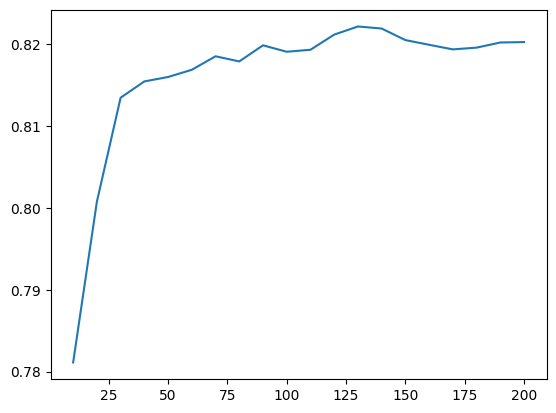

In [245]:
plt.plot(range(10, 201, 10), aucs)

### __Parameter tuning for random forest__

In [246]:
all_aucs = {}

for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)

    all_aucs[depth] = aucs
    print()

depth: 5
10 -> 0.788
20 -> 0.798
30 -> 0.800
40 -> 0.800
50 -> 0.800
60 -> 0.801
70 -> 0.802
80 -> 0.803
90 -> 0.804
100 -> 0.804
110 -> 0.807
120 -> 0.806
130 -> 0.808
140 -> 0.807
150 -> 0.807
160 -> 0.807
170 -> 0.807
180 -> 0.807
190 -> 0.807
200 -> 0.807

depth: 10
10 -> 0.791
20 -> 0.808
30 -> 0.812
40 -> 0.818
50 -> 0.817
60 -> 0.819
70 -> 0.820
80 -> 0.820
90 -> 0.820
100 -> 0.821
110 -> 0.823
120 -> 0.823
130 -> 0.825
140 -> 0.824
150 -> 0.824
160 -> 0.825
170 -> 0.825
180 -> 0.825
190 -> 0.825
200 -> 0.825

depth: 20
10 -> 0.776
20 -> 0.803
30 -> 0.813
40 -> 0.817
50 -> 0.815
60 -> 0.813
70 -> 0.814
80 -> 0.815
90 -> 0.814
100 -> 0.815
110 -> 0.817
120 -> 0.816
130 -> 0.818
140 -> 0.818
150 -> 0.818
160 -> 0.818
170 -> 0.817
180 -> 0.817
190 -> 0.817
200 -> 0.818



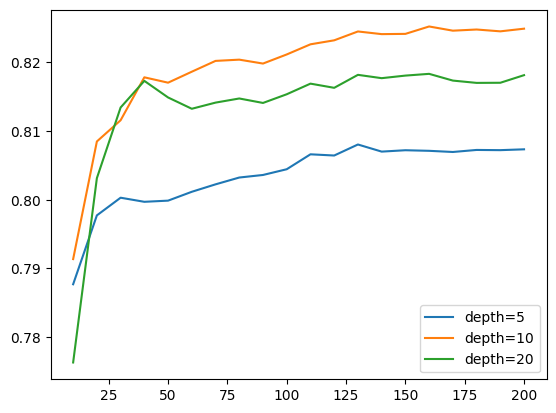

In [247]:
num_trees = list(range(10, 201, 10))
plt.plot(num_trees, all_aucs[5], label='depth=5')
plt.plot(num_trees, all_aucs[10], label='depth=10')
plt.plot(num_trees, all_aucs[20], label='depth=20')
plt.legend()

In [248]:
all_aucs = {}

for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)

    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.811
30 -> 0.823
50 -> 0.823
70 -> 0.822
90 -> 0.823
110 -> 0.823
130 -> 0.824
150 -> 0.825
170 -> 0.825
190 -> 0.825

min_samples_leaf: 5
10 -> 0.813
30 -> 0.818
50 -> 0.821
70 -> 0.822
90 -> 0.822
110 -> 0.825
130 -> 0.825
150 -> 0.825
170 -> 0.825
190 -> 0.826

min_samples_leaf: 10
10 -> 0.810
30 -> 0.822
50 -> 0.822
70 -> 0.819
90 -> 0.820
110 -> 0.820
130 -> 0.821
150 -> 0.820
170 -> 0.820
190 -> 0.820



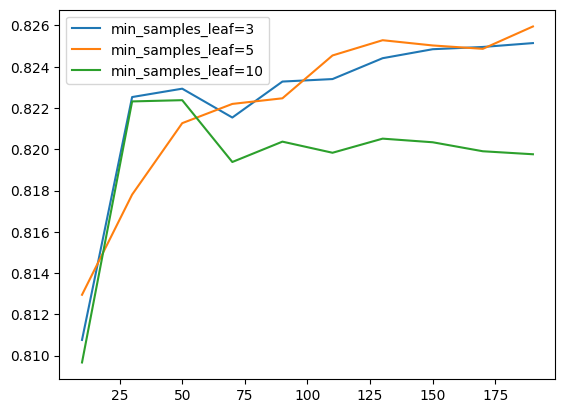

In [249]:
num_trees = list(range(10, 201, 20))
plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10')
plt.legend()

In [250]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)

## __Gadient Boosting__

### __XGBoost: Extreme Gradient Boosting__

In [251]:
import xgboost as xgb

In [252]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)

In [253]:
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [254]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [255]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

/home/raimundoivy/anaconda3/envs/decision_trees_and_ensemble_learning/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [17:14:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [256]:
y_pred = model.predict(dval)

In [257]:
roc_auc_score(y_val, y_pred)

0.8118506454190986

### __Model Perfomance Monitoring__

In [258]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [259]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [260]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=10)

[0]	train-auc:0.86653	val-auc:0.77999
[10]	train-auc:0.95512	val-auc:0.81115
[20]	train-auc:0.97648	val-auc:0.81877
[30]	train-auc:0.98844	val-auc:0.81613
[40]	train-auc:0.99393	val-auc:0.81407
[50]	train-auc:0.99723	val-auc:0.81276


/home/raimundoivy/anaconda3/envs/decision_trees_and_ensemble_learning/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [17:16:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[60]	train-auc:0.99861	val-auc:0.81244
[70]	train-auc:0.99962	val-auc:0.81243
[80]	train-auc:0.99989	val-auc:0.81359
[90]	train-auc:0.99998	val-auc:0.81038
[99]	train-auc:0.99999	val-auc:0.80838


In [261]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [262]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [263]:
model = xgb.train(xgb_params, dtrain, num_boost_round=500, verbose_eval=10, evals=watchlist)

[0]	train-auc:0.86653	val-auc:0.77999
[10]	train-auc:0.91936	val-auc:0.80573
[20]	train-auc:0.94007	val-auc:0.81551
[30]	train-auc:0.95175	val-auc:0.81942
[40]	train-auc:0.96125	val-auc:0.82243
[50]	train-auc:0.96869	val-auc:0.82559


/home/raimundoivy/anaconda3/envs/decision_trees_and_ensemble_learning/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [17:19:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[60]	train-auc:0.97493	val-auc:0.82736
[70]	train-auc:0.97937	val-auc:0.82631
[80]	train-auc:0.98397	val-auc:0.82811
[90]	train-auc:0.98770	val-auc:0.82851
[100]	train-auc:0.99024	val-auc:0.82711
[110]	train-auc:0.99222	val-auc:0.82692
[120]	train-auc:0.99392	val-auc:0.82615
[130]	train-auc:0.99532	val-auc:0.82555
[140]	train-auc:0.99615	val-auc:0.82531
[150]	train-auc:0.99679	val-auc:0.82529
[160]	train-auc:0.99792	val-auc:0.82328
[170]	train-auc:0.99854	val-auc:0.82380
[180]	train-auc:0.99887	val-auc:0.82378
[190]	train-auc:0.99916	val-auc:0.82288
[200]	train-auc:0.99938	val-auc:0.82214
[210]	train-auc:0.99953	val-auc:0.82089
[220]	train-auc:0.99962	val-auc:0.81993
[230]	train-auc:0.99971	val-auc:0.81925
[240]	train-auc:0.99982	val-auc:0.81907
[250]	train-auc:0.99989	val-auc:0.81935
[260]	train-auc:0.99992	val-auc:0.81858
[270]	train-auc:0.99994	val-auc:0.81769
[280]	train-auc:0.99996	val-auc:0.81749
[290]	train-auc:0.99998	val-auc:0.81757
[300]	train-auc:0.99999	val-auc:0.81707
[310

### __Parameter Tuning for XGBoost__

In [ ]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [264]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [265]:
model = xgb.train(xgb_params, dtrain, num_boost_round=500, verbose_eval=10, evals=watchlist)

[0]	train-auc:0.86653	val-auc:0.77999
[10]	train-auc:0.91936	val-auc:0.80573


/home/raimundoivy/anaconda3/envs/decision_trees_and_ensemble_learning/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [17:23:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[20]	train-auc:0.94007	val-auc:0.81551
[30]	train-auc:0.95175	val-auc:0.81942
[40]	train-auc:0.96125	val-auc:0.82243
[50]	train-auc:0.96869	val-auc:0.82559
[60]	train-auc:0.97493	val-auc:0.82736
[70]	train-auc:0.97937	val-auc:0.82631
[80]	train-auc:0.98397	val-auc:0.82811
[90]	train-auc:0.98770	val-auc:0.82851
[100]	train-auc:0.99024	val-auc:0.82711
[110]	train-auc:0.99222	val-auc:0.82692
[120]	train-auc:0.99392	val-auc:0.82615
[130]	train-auc:0.99532	val-auc:0.82555
[140]	train-auc:0.99615	val-auc:0.82531
[150]	train-auc:0.99679	val-auc:0.82529
[160]	train-auc:0.99792	val-auc:0.82328
[170]	train-auc:0.99854	val-auc:0.82380
[180]	train-auc:0.99887	val-auc:0.82378
[190]	train-auc:0.99916	val-auc:0.82288
[200]	train-auc:0.99938	val-auc:0.82214
[210]	train-auc:0.99953	val-auc:0.82089
[220]	train-auc:0.99962	val-auc:0.81993
[230]	train-auc:0.99971	val-auc:0.81925
[240]	train-auc:0.99982	val-auc:0.81907
[250]	train-auc:0.99989	val-auc:0.81935
[260]	train-auc:0.99992	val-auc:0.81858
[270]	tr

In [266]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

In [267]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

### __Final Model__

In [268]:
y_train = (df_train_full.status == 'default').values
y_test = (df_test.status == 'default').values

In [269]:
del df_train_full['status']
del df_test['status']

In [270]:
dict_train = df_train_full.fillna(0).to_dict(orient='records')
dict_test = df_test.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)

In [271]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'silent': 1
}

num_trees = 160

model = xgb.train(xgb_params, dtrain, num_boost_round=num_trees)

/home/raimundoivy/anaconda3/envs/decision_trees_and_ensemble_learning/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [17:26:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "silent" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [272]:
y_pred_xgb = model.predict(dtest)
roc_auc_score(y_test, y_pred_xgb)

0.8323212452959289

# __Serialize the Objects Using Pickle__

In [273]:
import pickle

In [274]:
output_file = 'model.bin'

In [275]:
# Open the file in write-binary mode
with open(output_file, 'wb') as f_out:
    # Use pickle.dump to save the tuple (vectorizer, model)
    pickle.dump((dv, dt), f_out)

print(f'The model and vectorizer have been saved to {output_file}')

The model and vectorizer have been saved to model.bin


In [276]:
import pickle

# Define the input file name
input_file = 'model.bin'

# Open the file in read-binary ('rb') mode
with open(input_file, 'rb') as f_in:
    # Load the tuple back and unpack it
    dv, dt = pickle.load(f_in)

print("Vectorizer and model loaded successfully.")

# You can now use 'dv' and 'dt' as if they were in your original notebook
# For example, you can check the model's parameters:
print(dt.get_params())

Vectorizer and model loaded successfully.
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 15, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
